In [3]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import SolidMotor
import datetime
import matplotlib.pyplot as plt
import os

from scipy.stats import monte_carlo_test

plt.style.use("seaborn-v0_8-colorblind")


Gravity Details

Acceleration of gravity at surface level:    9.7941 m/s²
Acceleration of gravity at  31.219 km (ASL): 9.6984 m/s²


Launch Site Details

Launch Date: 2025-05-03 12:00:00 UTC
Launch Site Latitude: 31.03917°
Launch Site Longitude: -103.53700°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 66834.50 W    3442797.35 N
Launch Site UTM zone: 13R
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: Ensemble
Ensemble Maximum Height: 31.219 km
Ensemble Time Period: from 2025-04-17 12:00:00 to 2025-05-03 12:00:00 utc
Ensemble Hour Interval: 6 hrs
Ensemble Latitude Range: From -90.0° to 90.0°
Ensemble Longitude Range: From 0.0° to 359.5°
Number of Ensemble Members: 31
Selected Ensemble Member: 0 (Starts from 0)


Surface Atmospheric Conditions

Surface Wind Speed: 4.71 m/s
Surface Wind Direction: 155.76°
Surface Wind Heading: 335.76°
Surface Pressure: 1000.00 hPa
Surface Temperature: 300.05 K
Surface Air Density: 1.161 kg/m³
Surface 

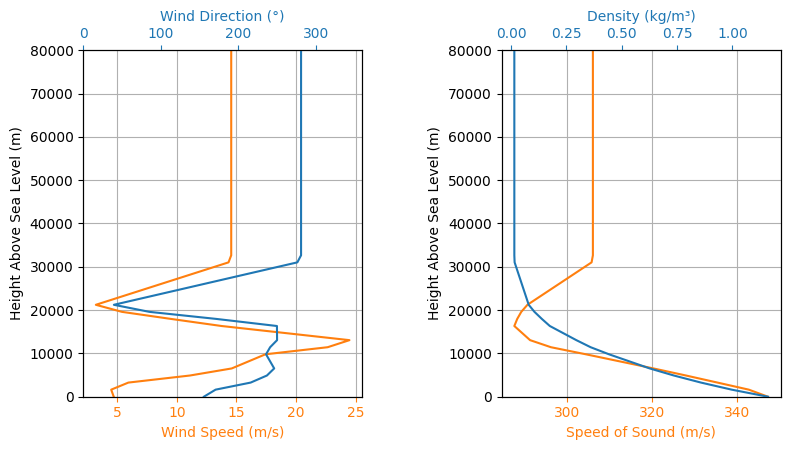

In [15]:
env = Environment(
    latitude=31.039168,
    longitude=-103.536997
)

launch_date  = datetime.date(year=2025, month=5, day=3)
env.set_date((launch_date.year, launch_date.month, launch_date.day, 12))


env.set_atmospheric_model(
    type="Ensemble", #use forecast for upcoming launches, ensemble for monte carlo, realanalysis for data analysis of past flights
    file="GEFS"
)
env.info()

In [7]:
#'GFS', 'NAM', 'RAP', 'HIRESW', 'GEFS', 'ERA5'
help(Environment())

Help on Environment in module rocketpy.environment.environment object:

class Environment(builtins.object)
 |  Environment(gravity=None, date=None, latitude=0.0, longitude=0.0, elevation=0.0, datum='SIRGAS2000', timezone='UTC', max_expected_height=80000.0)
 |  
 |  Keeps all environment information stored, such as wind and temperature
 |  conditions, as well as gravity.
 |  
 |  Attributes
 |  ----------
 |  Environment.earth_radius : float
 |      Value of Earth's Radius as 6.3781e6 m.
 |  Environment.air_gas_constant : float
 |      Value of Air's Gas Constant as 287.05287 J/K/Kg
 |  Environment.gravity : Function
 |      Gravitational acceleration. Positive values point the
 |      acceleration down. See :meth:`Environment.set_gravity_model` for more
 |      information.
 |  Environment.latitude : float
 |      Launch site latitude.
 |  Environment.longitude : float
 |      Launch site longitude.
 |  Environment.datum : string
 |      The desired reference ellipsoid model, the follo

In [4]:
N2220DM = SolidMotor(
    thrust_source=r"C:\Users\wadamc\PycharmProjects\vulcan_airbrakes_control\data\AeroTech_N2220DM.eng",
    dry_mass=4.814,
    dry_inertia=(0.4, 0.4, 0.02),  #measure
    nozzle_radius=2.737 * 0.0254 / 2,  
    grain_number=6,
    grain_density=1696,
    grain_outer_radius= 3.270 * 0.0254 / 2,
    grain_initial_inner_radius=1.25 * 0.0254 / 2,
    grain_initial_height=6* 0.0254,
    grain_separation=1/16* 0.0254,
    grains_center_of_mass_position=0.566,
    center_of_dry_mass_position=0.523,
    nozzle_position=0,
    burn_time=4.98,
    throat_radius=1 * 0.0254 / 2,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)


In [ ]:
N2220DM.all_info()

In [18]:
N3300R = SolidMotor(
    thrust_source=r"C:\Users\wadamc\PycharmProjects\vulcan_airbrakes_control\data\AeroTech_N3300R.eng",
    dry_mass=7.338,
    dry_inertia=(0.4, 0.4, 0.02),  #measure
    nozzle_radius=2.737 * 0.0254 / 2,  
    grain_number=6,
    grain_density=1730,
    grain_outer_radius= 3.365 * 0.0254 / 2,
    grain_initial_inner_radius=1.25 * 0.0254 / 2,
    grain_initial_height=6* 0.0254,
    grain_separation=1/16* 0.0254,
    grains_center_of_mass_position=0.566,
    center_of_dry_mass_position=0.523,
    nozzle_position=0,
    burn_time=4.4,
    throat_radius=1 * 0.0254 / 2,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
    
)

Nozzle Details
Nozzle Radius: 0.0347599 m
Nozzle Throat Radius: 0.0127 m

Grain Details
Number of Grains: 6
Grain Spacing: 0.0015875 m
Grain Density: 1730 kg/m3
Grain Outer Radius: 0.0427355 m
Grain Inner Radius: 0.015875 m
Grain Height: 0.15239999999999998 m
Grain Volume: 0.001 m3
Grain Mass: 1.304 kg

Motor Details
Total Burning Time: 4.4 s
Total Propellant Mass: 7.824 kg
Structural Mass Ratio: 0.484
Average Propellant Exhaust Velocity: 1791.769 m/s
Average Thrust: 3186.039 N
Maximum Thrust: 3775.78 N at 0.125 s after ignition.
Total Impulse: 14018.574 Ns



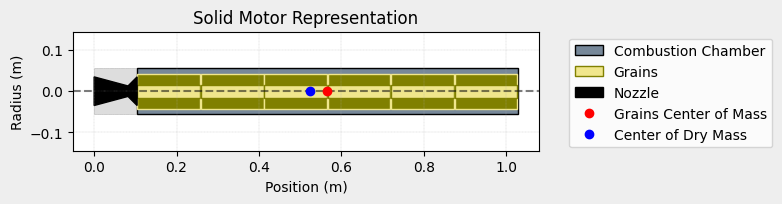

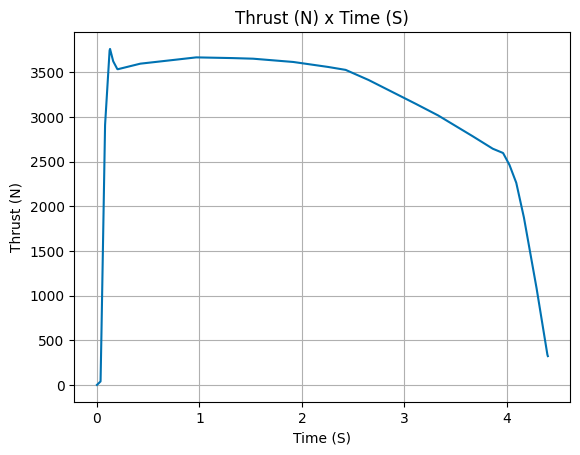

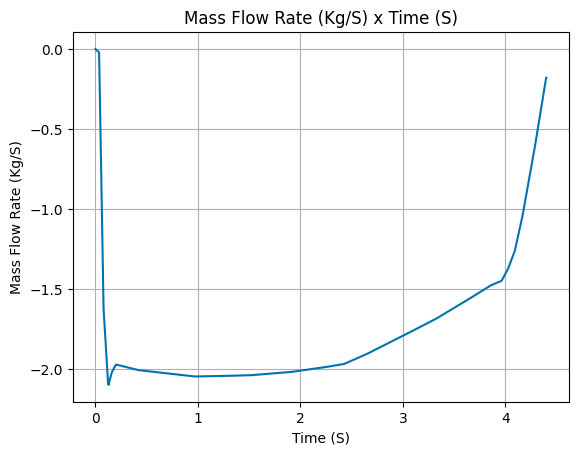

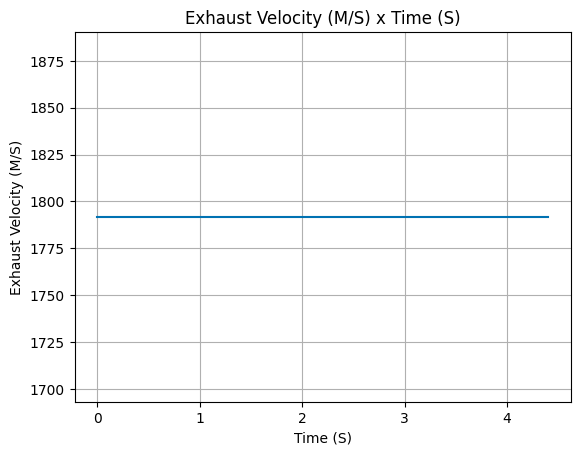

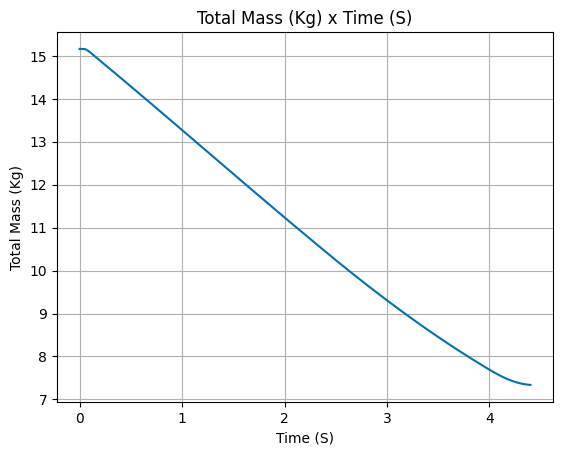

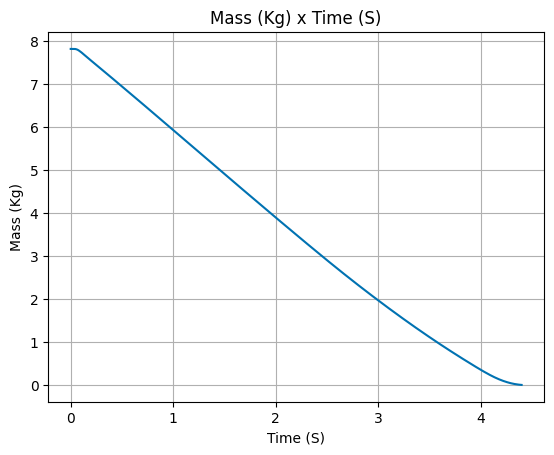

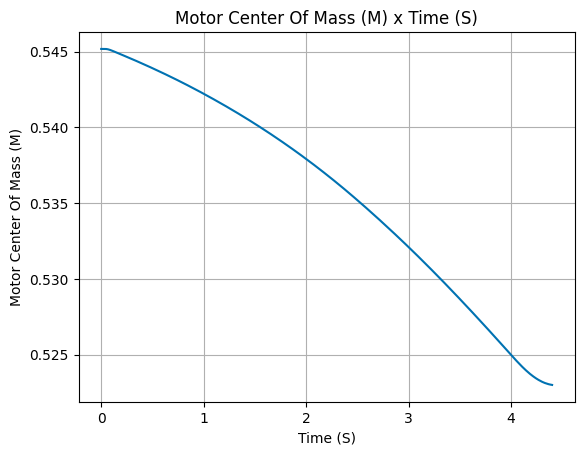

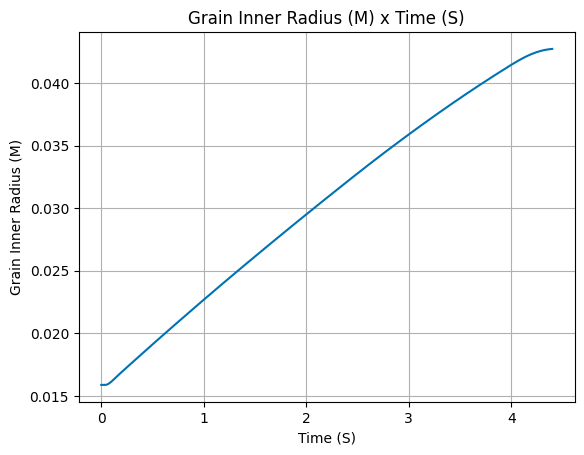

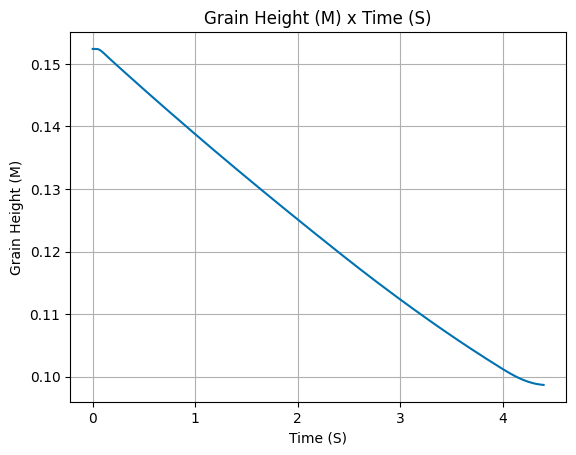

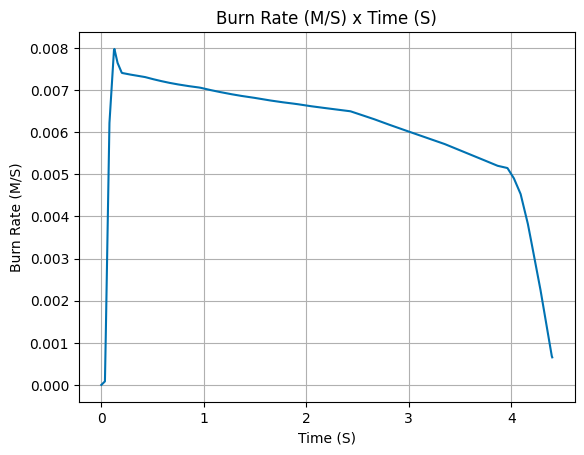

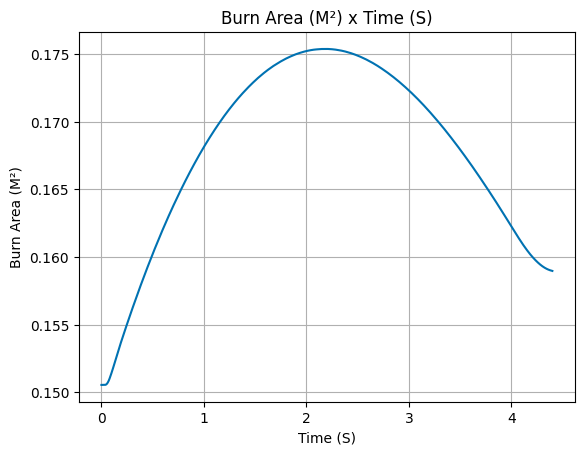

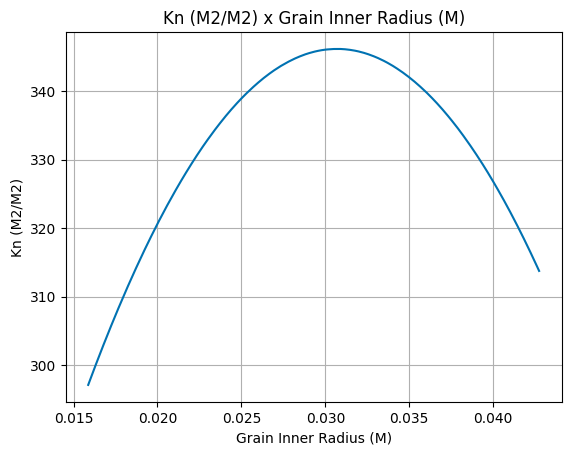

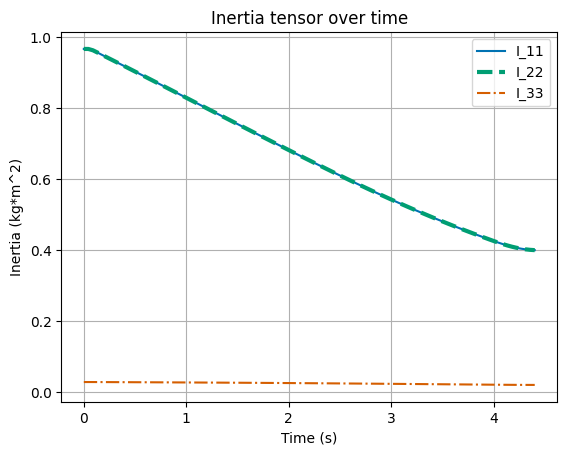

In [19]:
N3300R.all_info()

In [20]:
Vulcan = Rocket(
    radius=15.7 / 200, #
    mass=24.929,
    inertia=(4.449, 4.449, 1), #measure
    center_of_mass_without_motor=0, #defined as origin
    power_off_drag=r"C:\Users\wadamc\PycharmProjects\vulcan_airbrakes_control\data\power_off_drag.CSV",
    power_on_drag=r"C:\Users\wadamc\PycharmProjects\vulcan_airbrakes_control\data\power_on_drag.CSV",
    coordinate_system_orientation="tail_to_nose",
)


In [21]:
nose_cone = Vulcan.add_nose(
    length=92.7/100, kind="von karman", position=2.01
)

In [22]:
tail = Vulcan.add_tail(
    top_radius=6.17*2.54/200, 
    bottom_radius=2.0000*2.54/100, 
    length=14/100, 
    position=-157/100
)


In [23]:
fin_set = Vulcan.add_trapezoidal_fins(
    n=4,
    root_chord=30.5/100,
    tip_chord=10.2/100,
    span=7*2.54/100,
    sweep_length=17.8/100,
    position=-125/100,
    cant_angle=0,
) 


Inertia Details

Rocket Mass: 24.929 kg (without motor)
Rocket Dry Mass: 24.929 kg (with unloaded motor)
Rocket Loaded Mass: 24.929 kg
Rocket Structural Mass Ratio: 1.000
Rocket Inertia (with unloaded motor) 11: 4.449 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.449 kg*m2
Rocket Inertia (with unloaded motor) 33: 1.000 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0785 m
Rocket Frontal Area: 0.019359 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 0.000 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.000 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.000 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Tail Lift Coefficient Derivative: -1.155/rad
Fins Lift Coefficient D

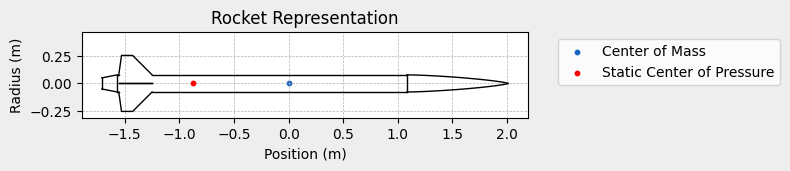


Mass Plots
----------------------------------------


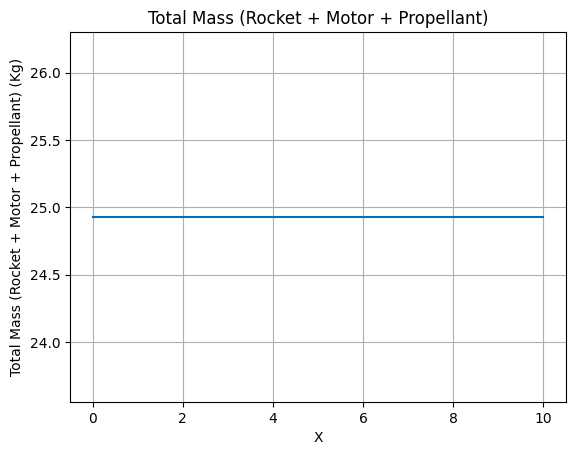

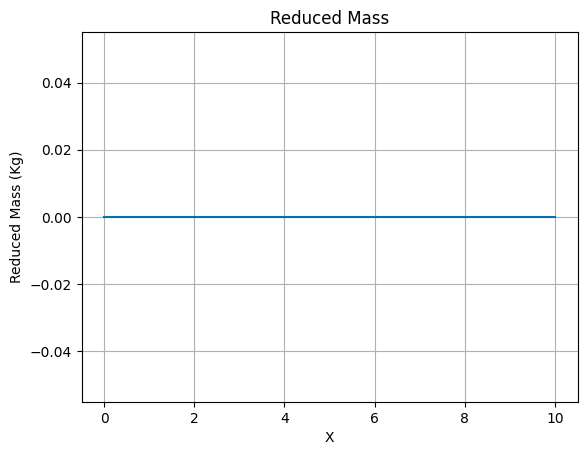


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


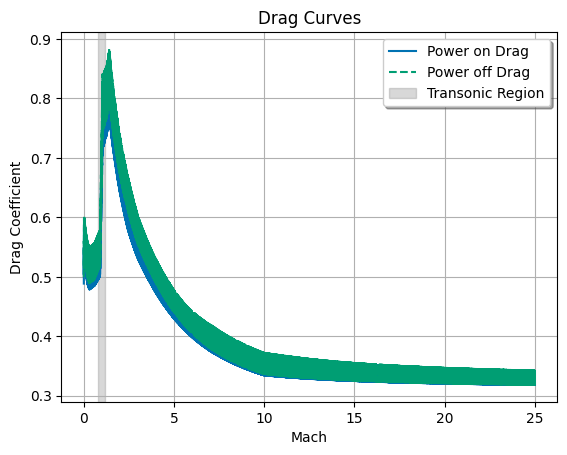


Stability Plots
--------------------


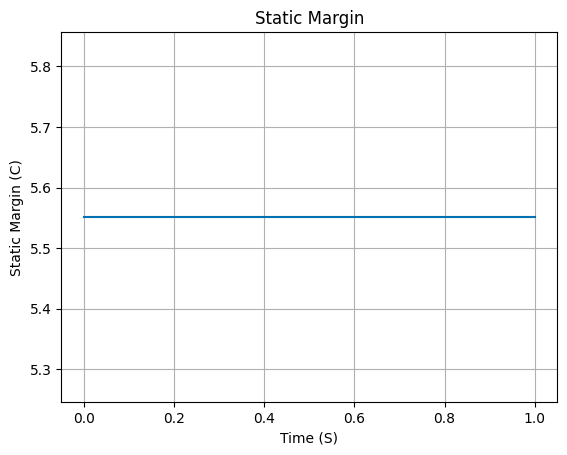

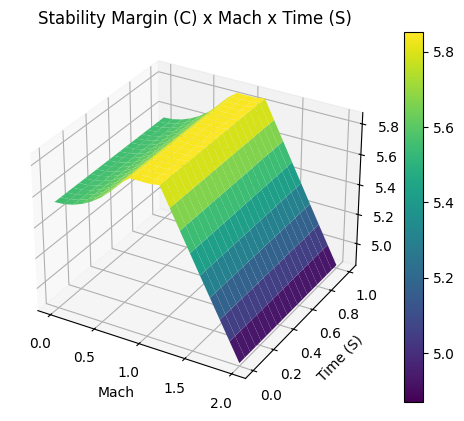


Thrust-to-Weight Plot
----------------------------------------


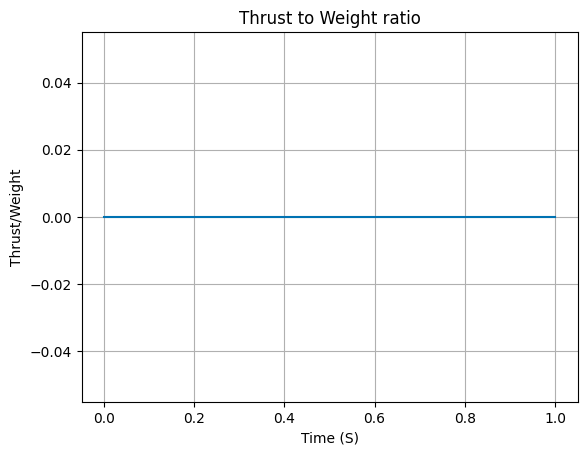

In [24]:
Vulcan.all_info()

In [11]:
#add sensor 
#add airbrakes
#add controller function 

In [12]:
def controller_function(
    time, sampling_rate, state, state_history, observed_variables, air_brakes
):
    # state = [x, y, z, vx, vy, vz, e0, e1, e2, e3, wx, wy, wz]
    altitude_ASL = state[2]
    altitude_AGL = altitude_ASL - env.elevation
    vx, vy, vz = state[3], state[4], state[5]

    # Get winds in x and y directions
    wind_x, wind_y = env.wind_velocity_x(altitude_ASL), env.wind_velocity_y(altitude_ASL)

    # Calculate Mach number
    free_stream_speed = (
        (wind_x - vx) ** 2 + (wind_y - vy) ** 2 + (vz) ** 2
    ) ** 0.5
    mach_number = free_stream_speed / env.speed_of_sound(altitude_ASL)

    # Get previous state from state_history
    previous_state = state_history[-1]
    previous_vz = previous_state[5]

    # If we wanted to we could get the returned values from observed_variables:
    # returned_time, deployment_level, drag_coefficient = observed_variables[-1]

    # Check if the rocket has reached burnout
    if time < N2220DM.burn_out_time:
        return None

    # If below 1500 meters above ground level, air_brakes are not deployed
    if altitude_AGL < 1500:
        air_brakes.deployment_level = 0

    # Else calculate the deployment level
    else:
        # Controller logic
        new_deployment_level = (
            air_brakes.deployment_level + 0.1 * vz + 0.01 * previous_vz**2
        )

        # Limiting the speed of the air_brakes to 0.2 per second
        # Since this function is called every 1/sampling_rate seconds
        # the max change in deployment level per call is 0.2/sampling_rate
        max_change = 0.2 / sampling_rate
        lower_bound = air_brakes.deployment_level - max_change
        upper_bound = air_brakes.deployment_level + max_change
        new_deployment_level = min(max(new_deployment_level, lower_bound), upper_bound)

        air_brakes.deployment_level = new_deployment_level

    # Return variables of interest to be saved in the observed_variables list
    return (
        time,
        air_brakes.deployment_level,
        air_brakes.drag_coefficient(air_brakes.deployment_level, mach_number),
    )

In [13]:
air_brakes = Vulcan.add_air_brakes(
    drag_coefficient_curve=1,
    controller_function=1,
    sampling_rate=10,
    reference_area=None,
    clamp=True,
    initial_observed_variables=[0, 0, 0],
    override_rocket_drag=False,
    name="Air Brakes",
    )

ValueError: Inputs must be a string or a list of strings with the length of the domain dimension.

In [26]:
Vulcan.add_motor(N3300R, position=-163.6/100) 


Inertia Details

Rocket Mass: 24.929 kg (without motor)
Rocket Dry Mass: 32.267 kg (with unloaded motor)
Rocket Loaded Mass: 40.091 kg
Rocket Structural Mass Ratio: 0.805
Rocket Inertia (with unloaded motor) 11: 11.872 kg*m2
Rocket Inertia (with unloaded motor) 22: 11.872 kg*m2
Rocket Inertia (with unloaded motor) 33: 1.020 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0785 m
Rocket Frontal Area: 0.019359 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.253 m
Rocket Center of Dry Mass - Nozzle Exit: 1.383 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.817 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.159 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 11.262/rad
Tail Lift Coefficient

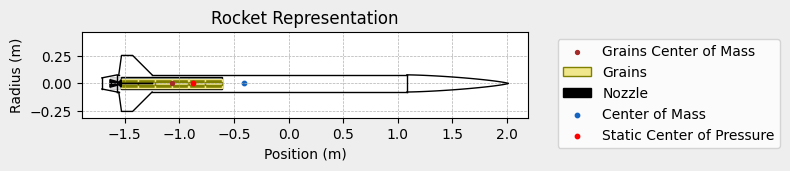


Mass Plots
----------------------------------------


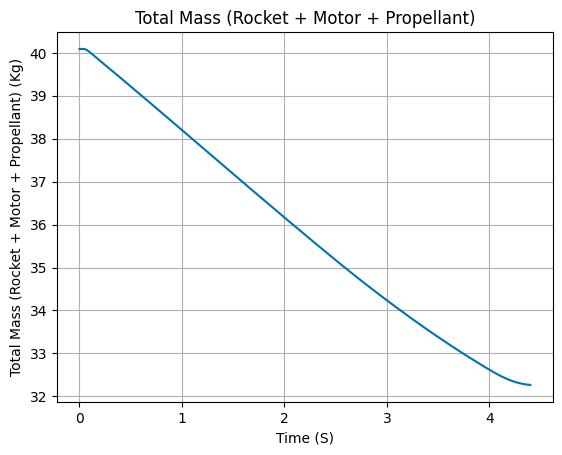

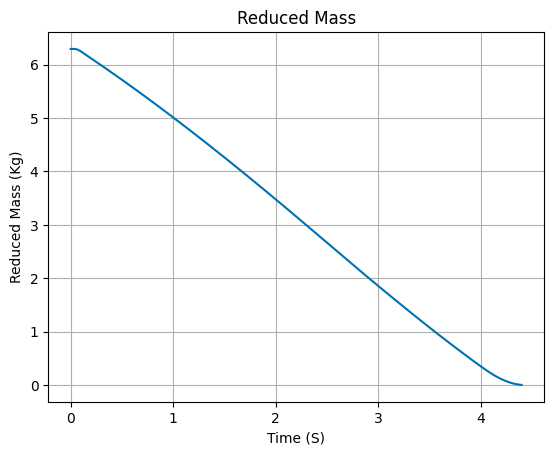


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


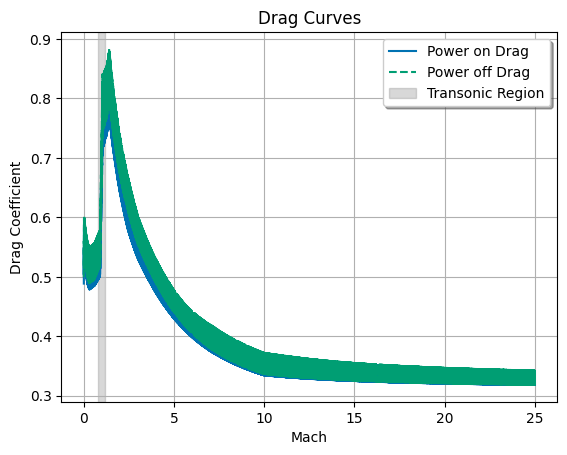


Stability Plots
--------------------


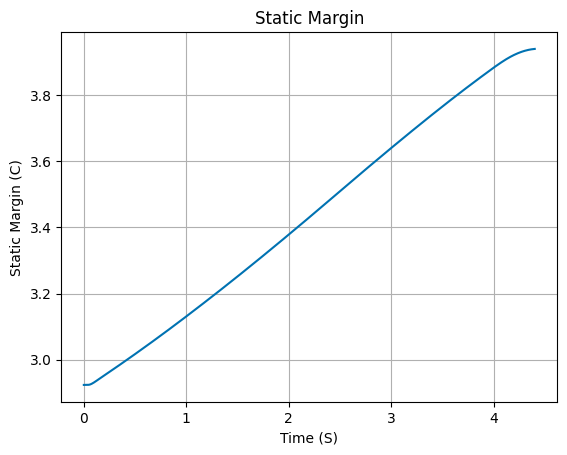

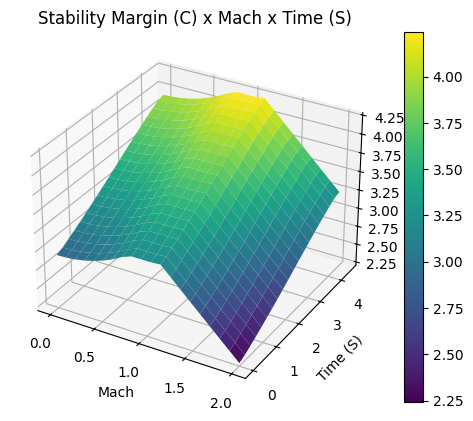


Thrust-to-Weight Plot
----------------------------------------


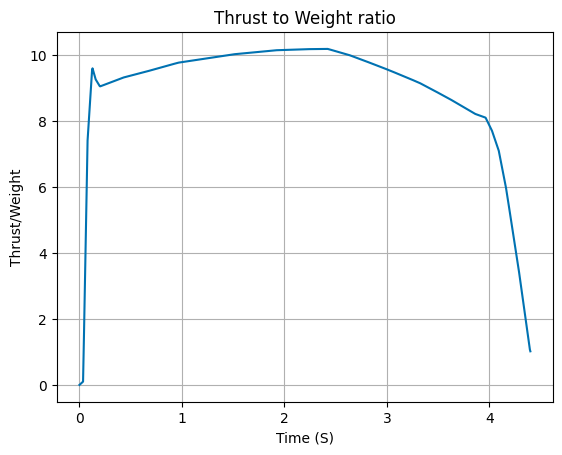

In [27]:
Vulcan.all_info() #


In [28]:
test_flight = Flight(
    rocket=Vulcan, environment=env, inclination=84, heading=133, rail_length=5.18
)

In [29]:
test_flight.info()



Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 0.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.398 | e1: -0.021 | e2: 0.048 | e3: -0.916
Euler Angles - Spin φ : 0.00° | Nutation θ: -6.00° | Precession ψ: -133.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.924 c


Surface Wind Conditions

Frontal Surface Wind Speed: -4.34 m/s
Lateral Surface Wind Speed: 1.82 m/s


Launch Rail

Launch Rail Length: 5.18 m
Launch Rail Inclination: 84.00°
Launch Rail Heading: 133.00°


Rail Departure State

Rail Departure Time: 0.426 s
Rail Departure Velocity: 28.845 m/s
Rail Departure Stability Margin: 3.004 c
Rail Departure Angle of Attack: 9.090°
Rail Departure Thrust-Weight Ratio: 9.321
Rail Departure Reynolds Number: 2.930e+05


Burn out State

Burn out time: 4.400 s
Altitude at burn out: 746.213 m (ASL) | 746.213 m (AGL)
Rocket speed at burn out: 316.840 m/s
Freestream vel


Apogee State

Apogee Time: 26.959 s
Apogee Altitude: 3645.287 m (ASL) | 3645.287 m (AGL)
Apogee Freestream Speed: 45.710 m/s
Apogee X position: 837.280 m
Apogee Y position: -1080.835 m
Apogee latitude: 31.0294498°
Apogee longitude: -103.5282118°


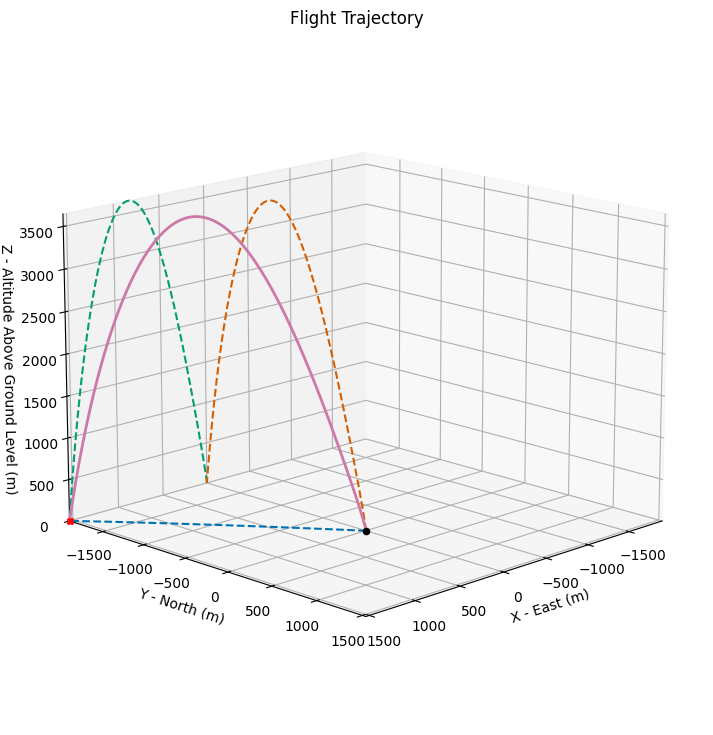

In [30]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

In [31]:
test_flight.export_kml(
    file_name="../results/trajectory.kml",
    extrude=True,
    altitude_mode="relative_to_ground",
)

File  ../results/trajectory.kml  saved with success!


In [33]:
#stochastic Model
%load_ext autoreload
%autoreload 2

In [34]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, MonteCarlo, Function
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticSolidMotor,
    StochasticRocket,
    StochasticFlight,
    StochasticNoseCone,
    StochasticTail,
    StochasticTrapezoidalFins,
    StochasticParachute,
    StochasticRailButtons,
)
import datetime

In [276]:
%matplotlib widget

RuntimeError: 'widget is not a recognised GUI loop or backend name

In [35]:
stochastic_env = StochasticEnvironment(
    environment=env,
    ensemble_member=list(range(env.num_ensemble_members)),
)

stochastic_env.visualize_attributes()

Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                0.0
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	latitude                 31.039168
	longitude                -103.536997
	timezone                 UTC

Stochastic Attributes:
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)

Stochastic Attributes with choice of values:
	ensemble_member [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [36]:
N3300R_stochastic = StochasticSolidMotor(
    solid_motor = N3300R
)

N3300R_stochastic.visualize_attributes()

Reporting the attributes of the `StochasticSolidMotor` object:

Constant Attributes:
	burn_out_time                    4.4
	burn_start_time                  0
	center_of_dry_mass_position      0.523
	coordinate_system_orientation    nozzle_to_combustion_chamber
	dry_I_11                         0.4
	dry_I_12                         0
	dry_I_13                         0
	dry_I_22                         0.4
	dry_I_23                         0
	dry_I_33                         0.02
	dry_mass                         7.338
	grain_density                    1730
	grain_initial_height             0.15239999999999998
	grain_initial_inner_radius       0.015875
	grain_number                     6
	grain_outer_radius               0.0427355
	grain_separation                 0.0015875
	grains_center_of_mass_position   0.566
	interpolate                      linear
	nozzle_position                  0
	nozzle_radius                    0.0347599
	throat_radius                    0.0127
	thrust_sourc

In [37]:
Vulcan_stochastic = StochasticRocket(
    rocket=Vulcan
)
Vulcan_stochastic.visualize_attributes()

Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_11_without_motor              4.449
	I_12_without_motor              0
	I_13_without_motor              0
	I_22_without_motor              4.449
	I_23_without_motor              0
	I_33_without_motor              1
	center_of_mass_without_motor    0
	coordinate_system_orientation   tail_to_nose
	mass                            24.929
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)
	power_on_drag                   Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)
	radius                          0.0785

Stochastic Attributes:
	power_off_drag_factor           1.00000 ± 0.00000 (normal)
	power_on_drag_factor            1.00000 ± 0.00000 (normal)


In [38]:
stochastic_nose_cone = StochasticNoseCone(
    nosecone=nose_cone,
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins=fin_set,
)

stochastic_tail = StochasticTail(
    tail=tail,
)

In [39]:
Vulcan_stochastic.add_motor(N3300R_stochastic)
Vulcan_stochastic.add_nose(stochastic_nose_cone)
Vulcan_stochastic.add_trapezoidal_fins(stochastic_fin_set)
Vulcan_stochastic.add_tail(stochastic_tail)

In [40]:
Vulcan_stochastic.visualize_attributes()

Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_11_without_motor              4.449
	I_12_without_motor              0
	I_13_without_motor              0
	I_22_without_motor              4.449
	I_23_without_motor              0
	I_33_without_motor              1
	center_of_mass_without_motor    0
	coordinate_system_orientation   tail_to_nose
	mass                            24.929
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)
	power_on_drag                   Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)
	radius                          0.0785

Stochastic Attributes:
	power_off_drag_factor           1.00000 ± 0.00000 (normal)
	power_on_drag_factor            1.00000 ± 0.00000 (normal)


In [41]:
stochastic_flight = StochasticFlight(
    flight=test_flight,
    inclination=(84.7, 1),  
    heading=(53, 2),  
)
stochastic_flight.visualize_attributes()

Reporting the attributes of the `StochasticFlight` object:

Constant Attributes:
	rail_length           5.18

Stochastic Attributes:
	heading               53.00000 ± 2.00000 (normal)
	inclination           84.70000 ± 1.00000 (normal)


In [42]:
test_dispersion = MonteCarlo(
    filename="../monte_carlo_analysis_outputs/tes1",
    environment=stochastic_env,
    rocket=Vulcan_stochastic,
    flight=stochastic_flight,
)


The following input file was imported: ../monte_carlo_analysis_outputs/tes1.inputs.txt
A total of 1000 simulations results were loaded from the following output file: ../monte_carlo_analysis_outputs/tes1.outputs.txt

The following error file was imported: ../monte_carlo_analysis_outputs/tes1.errors.txt


C:\Users\wadamc\PycharmProjects\vulcan_airbrakes_control\.venv\Lib\site-packages\rocketpy\simulation\monte_carlo.py:133: UserWarning: This class is still under testing and some attributes may be changed in next versions
  warnings.warn(


In [43]:
test_dispersion.simulate(
    number_of_simulations=1000, append=False, include_function_data=False
)

Completed 1000 iterations. Total CPU time: 1738.8 s. Total wall time: 1739.4 sme left: 0 s   
Saving results.
Results saved to ../monte_carlo_analysis_outputs/tes1.outputs.txt


In [36]:
test_dispersion.num_of_loaded_sims

1000

In [50]:
test_dispersion.export_ellipses_to_kml(filename="monte_carlo_test.kml", 
                                       origin_lat=31.039168,
                                       origin_lon=-103.536997)

In [48]:
test_dispersion.prints.all()

Monte Carlo Simulation by RocketPy
Data Source:  ../monte_carlo_analysis_outputs/tes1
Number of simulations:  1000
Results: 

                Parameter            Mean          Median       Std. Dev.    95% PI Lower    95% PI Upper
--------------------------------------------------------------------------------------------------------------
                   apogee        3770.783        3794.491          70.830        3570.106        3831.646
                 apogee_y         331.351         257.722         414.328        -301.059        1421.701
     out_of_rail_velocity          29.263          29.263           0.003          29.258          29.270
     frontal_surface_wind           2.879           2.970           3.090          -3.366           9.018
                 y_impact         609.448         464.717         738.835        -484.930        2555.685
     lateral_surface_wind          -1.228          -0.373           3.604          -8.631           4.573
out_of_rail_stability

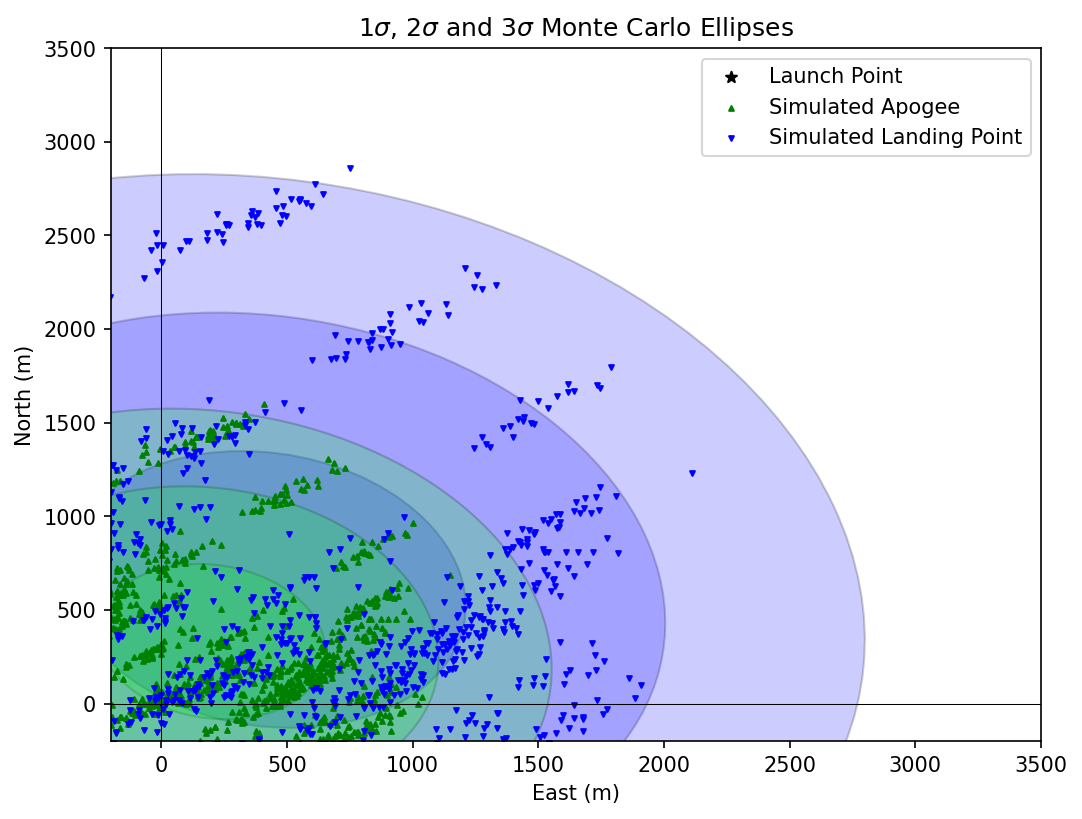

In [45]:
test_dispersion.plots.ellipses(xlim=(-200, 3500), ylim=(-200, 3500))

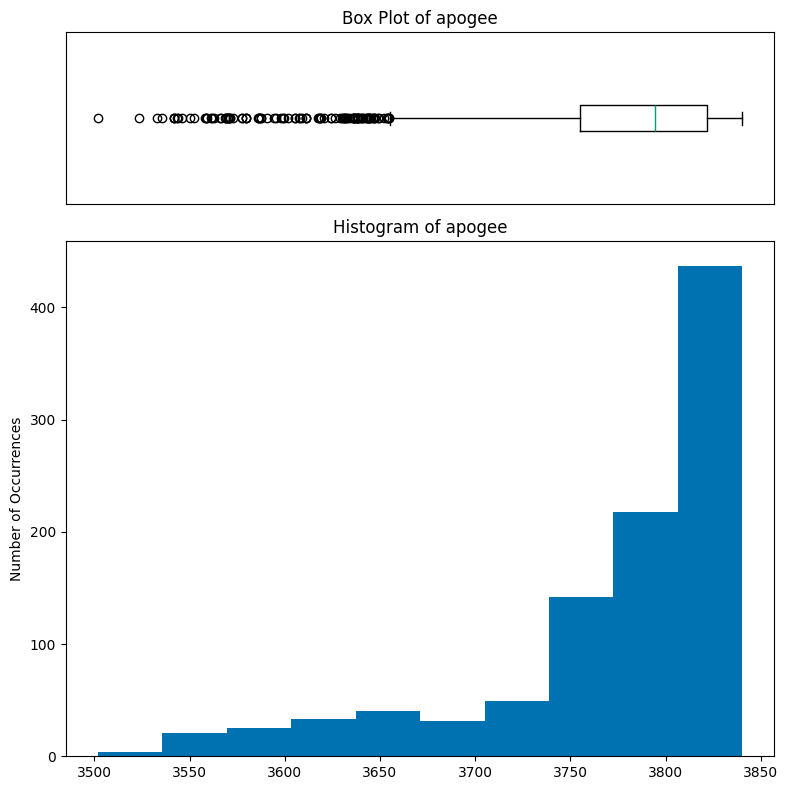

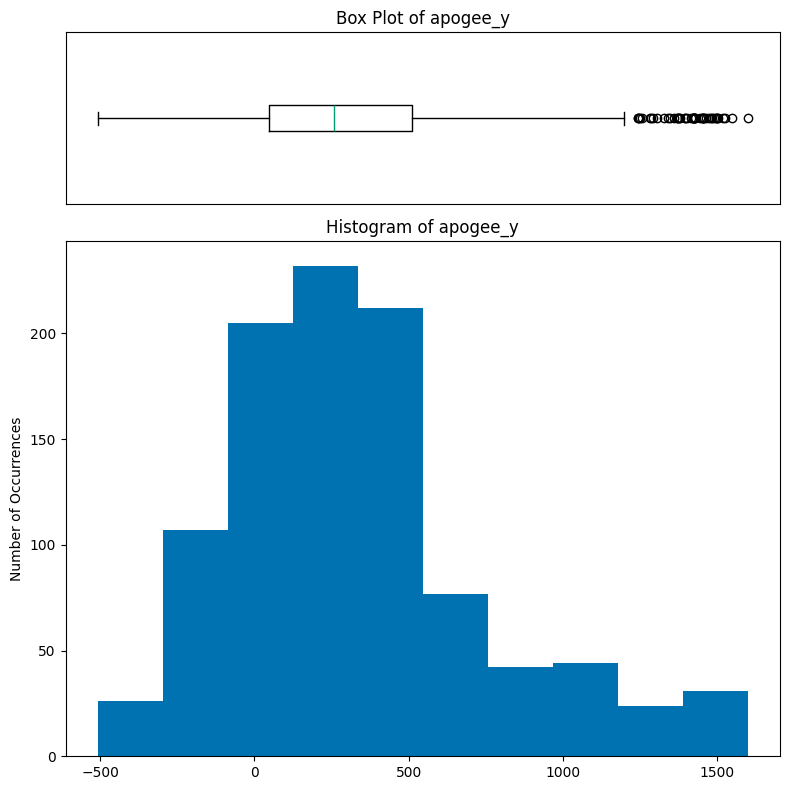

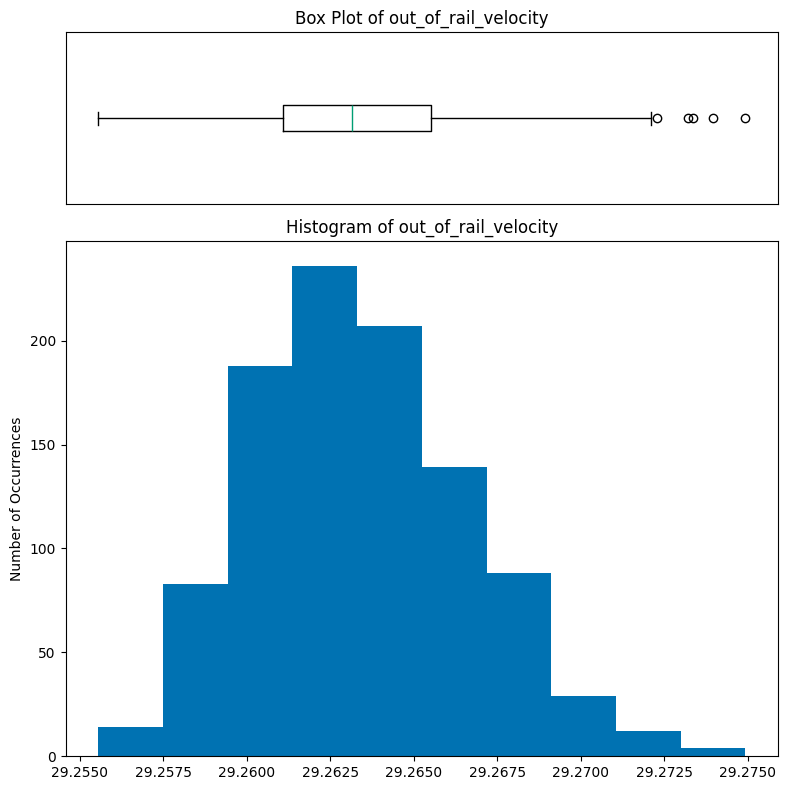

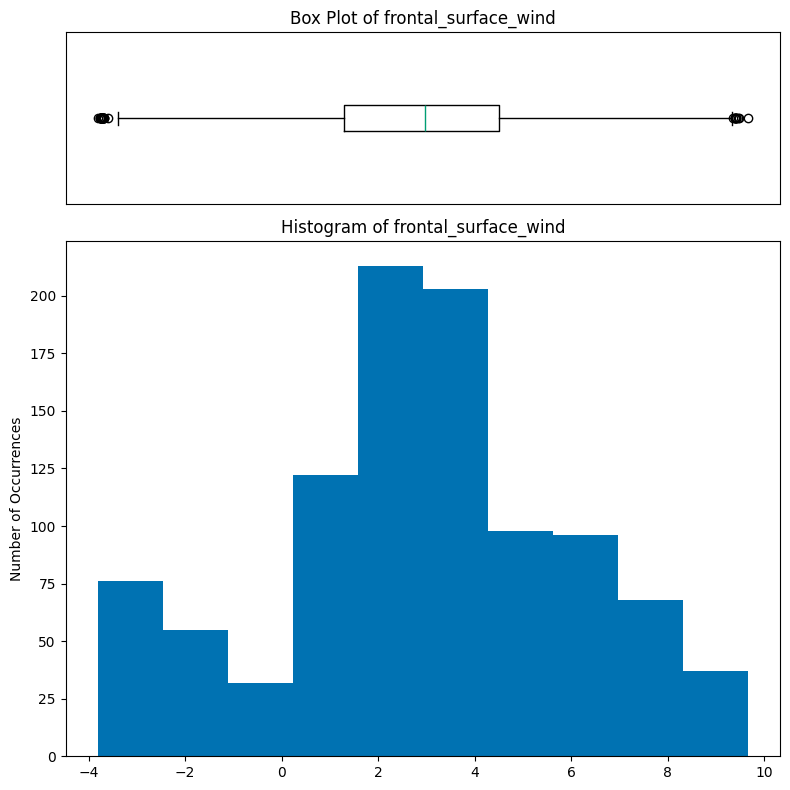

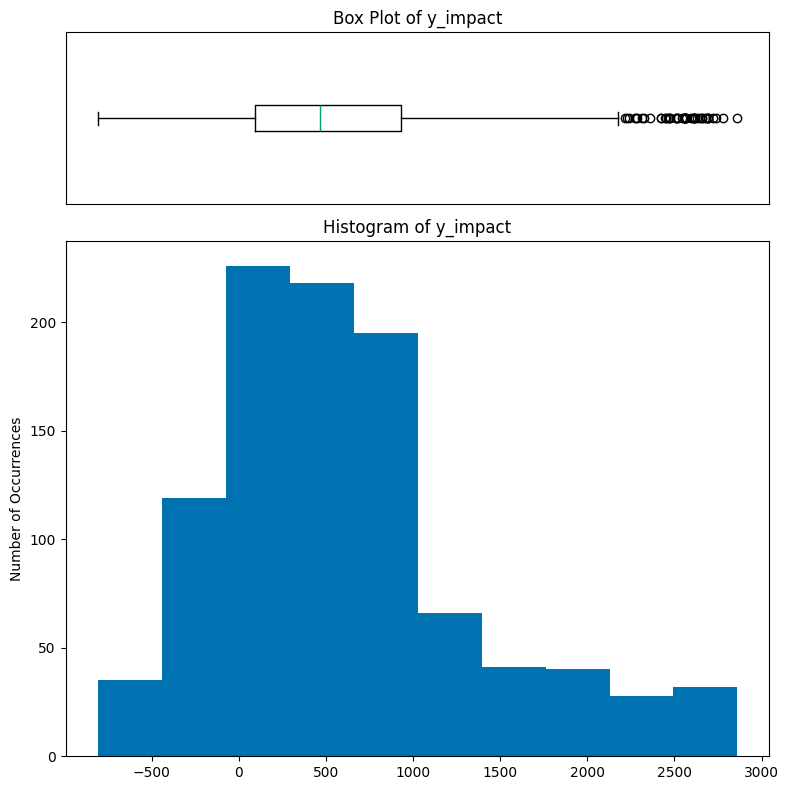

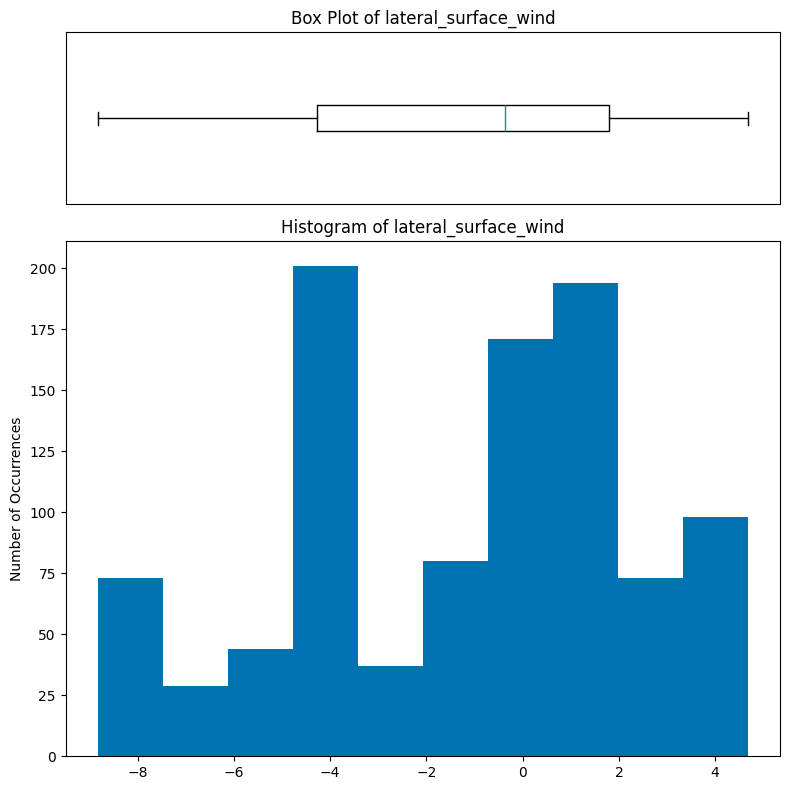

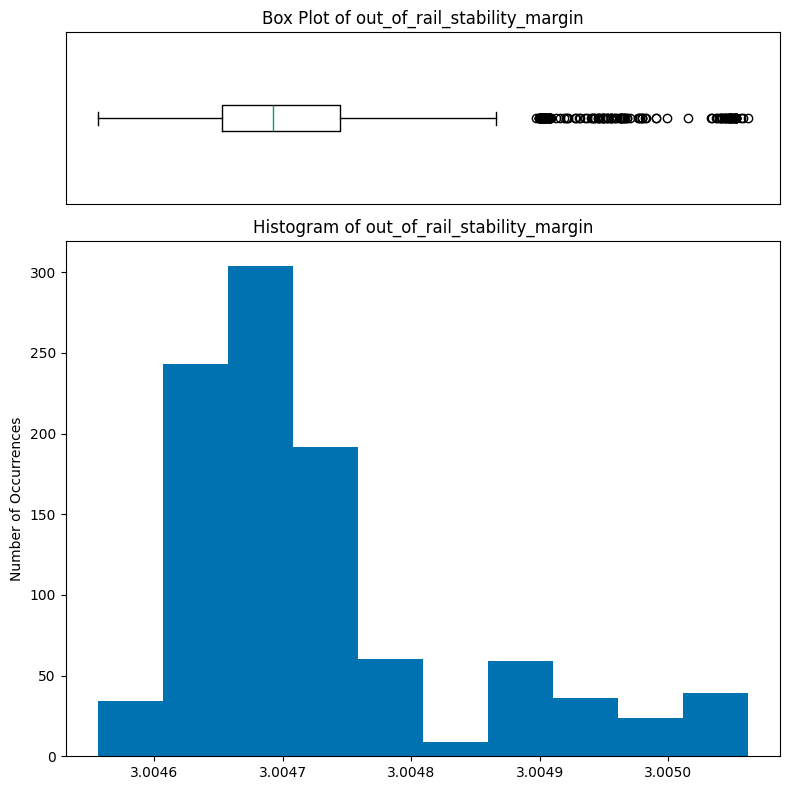

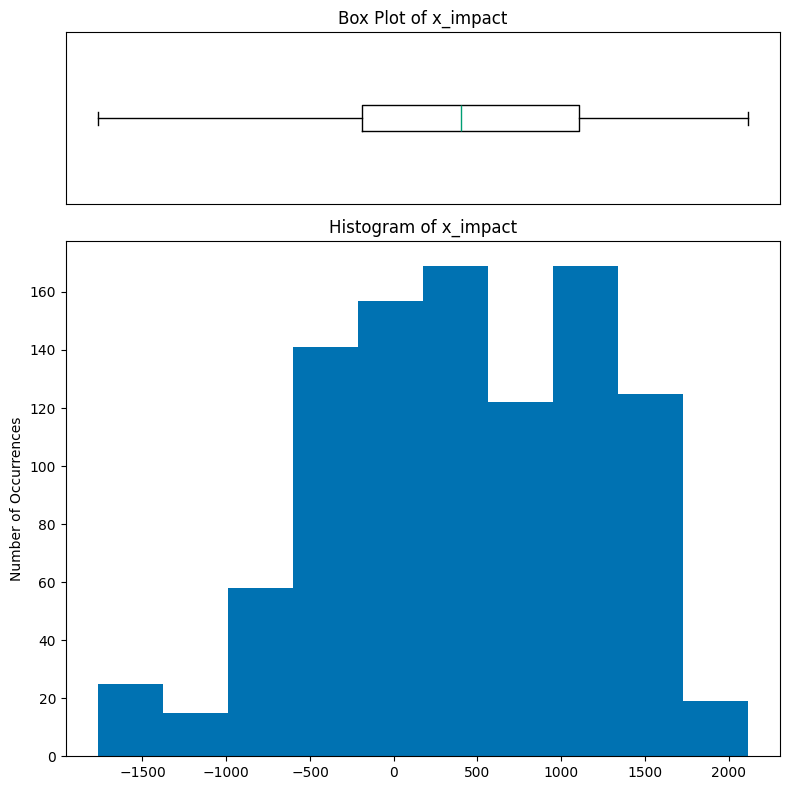

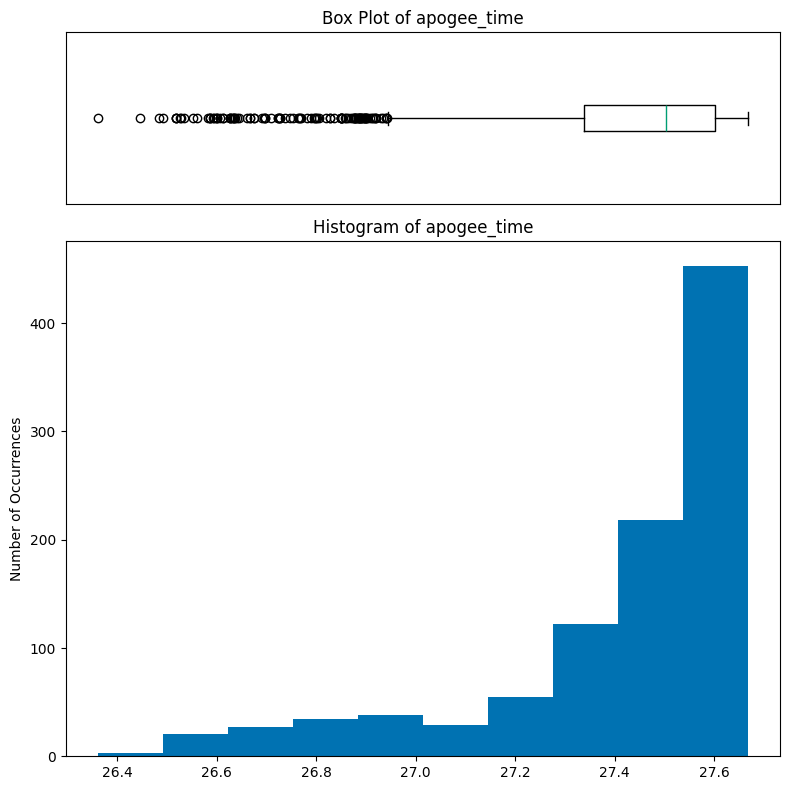

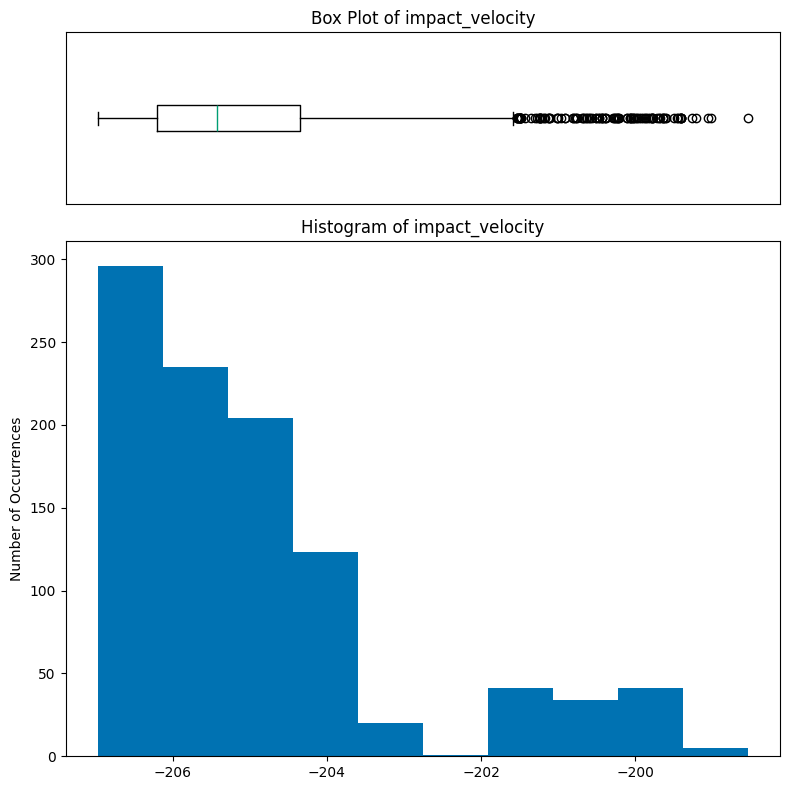

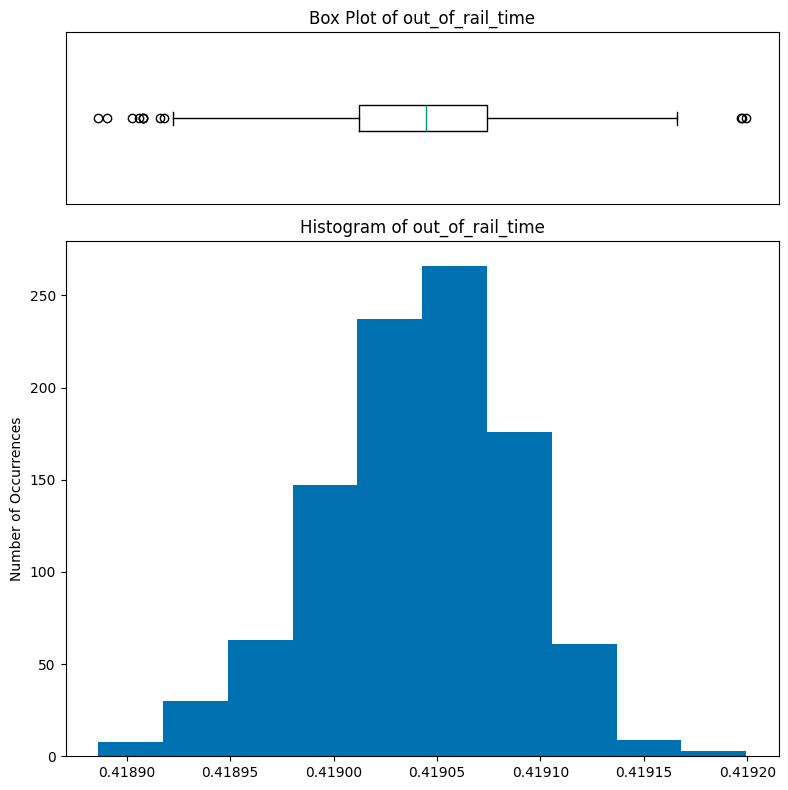

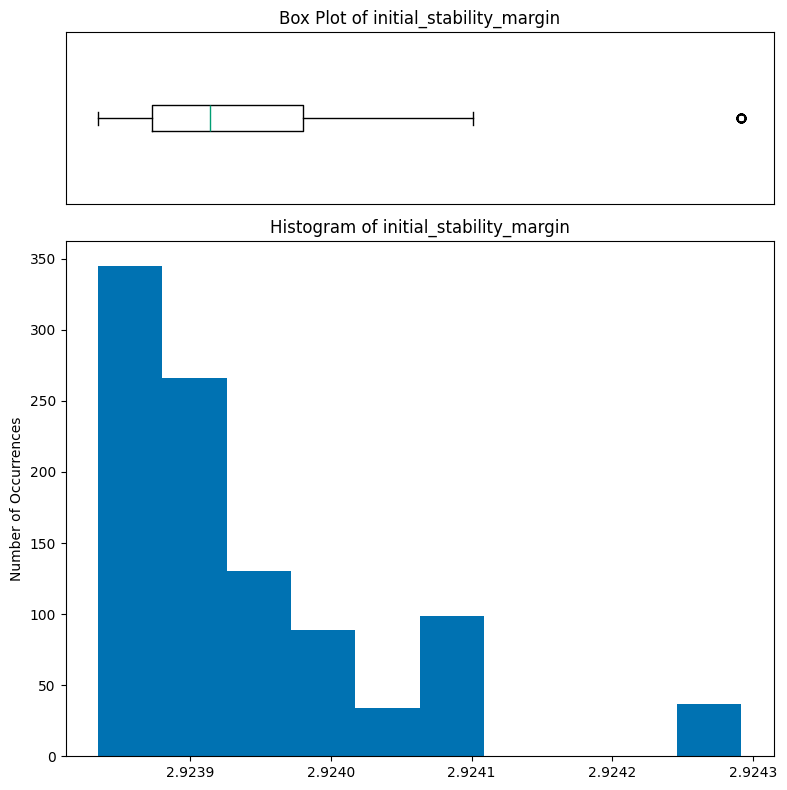

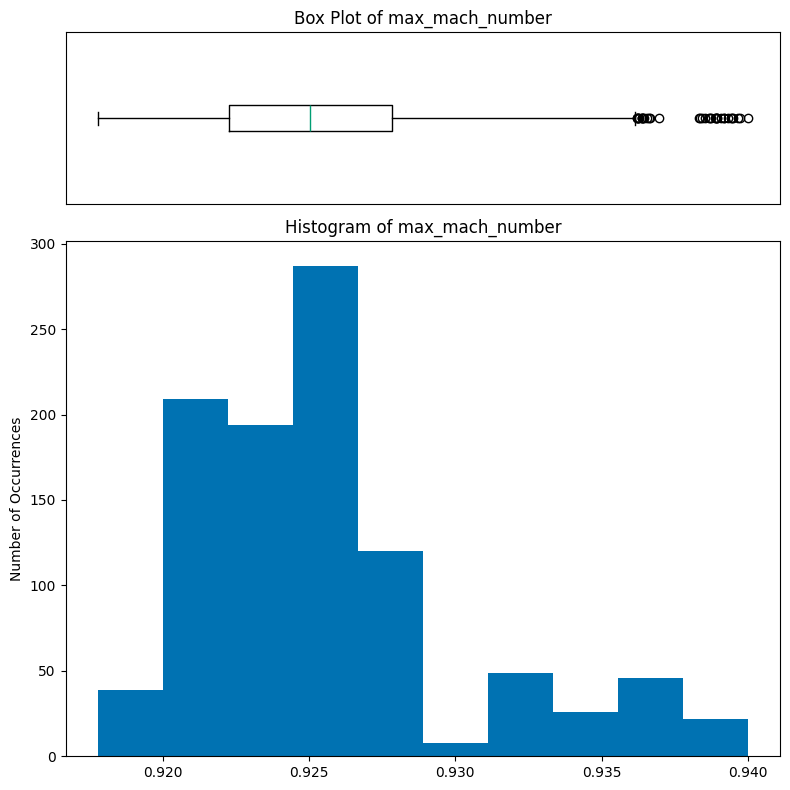

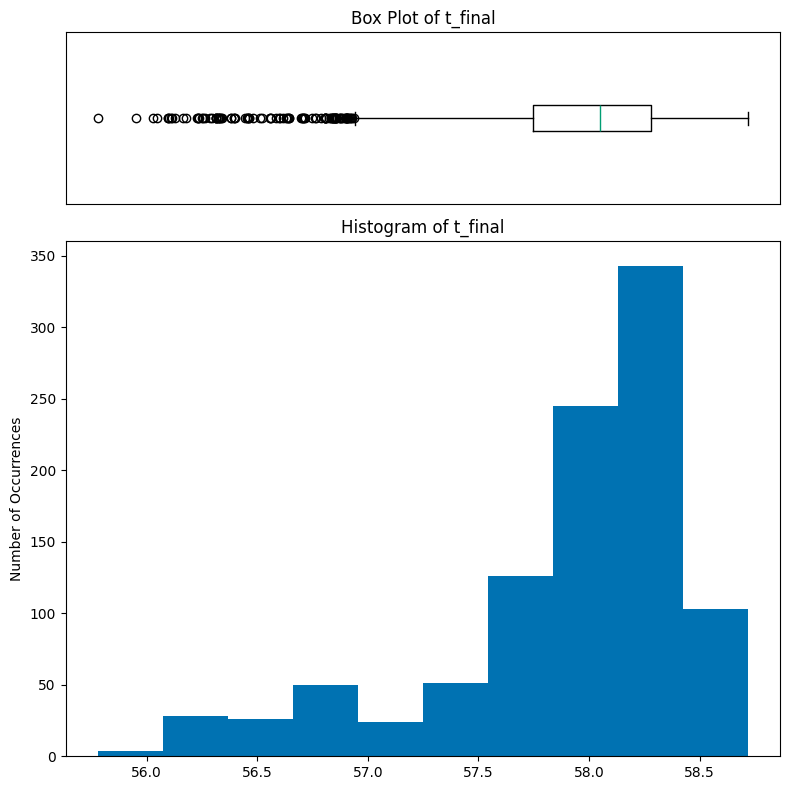

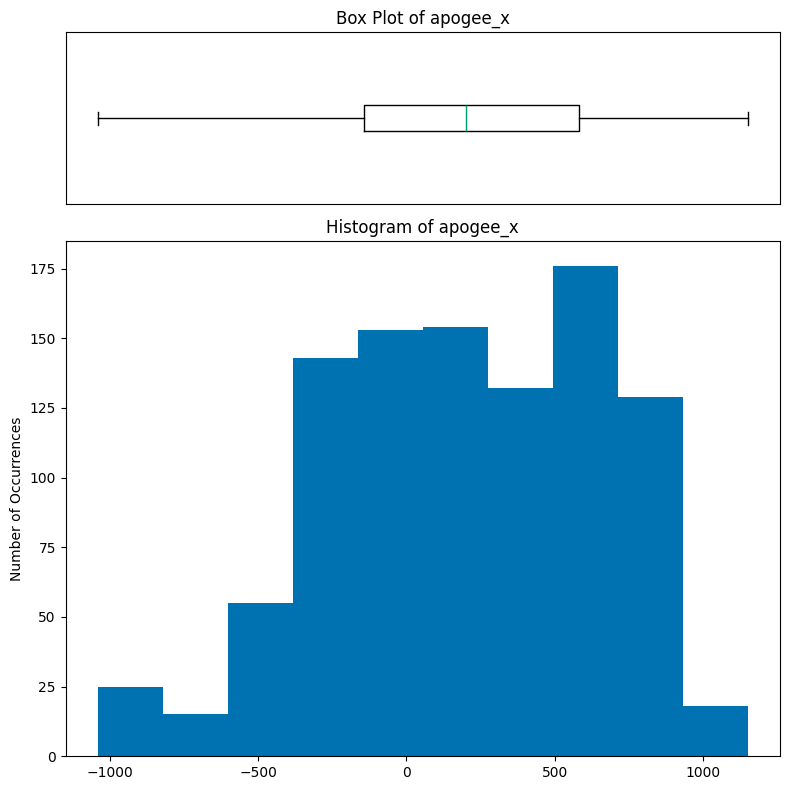

In [46]:
test_dispersion.plots.all()

AttributeError: 'MonteCarlo' object has no attribute 'size'

<Figure size 1000x800 with 0 Axes>